## Import Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Read Data

In [2]:
data = pd.read_csv("data_file.csv")
data.head()  

,id,ph,temperature,adsorbent_dose,contact_time,eff
0,1,9,328,40,50,98.92
1,2,7,318,30,20,98.72
2,3,7,318,50,40,99.78
3,4,5,308,20,30,80.74
4,5,7,318,30,40,99.11


In [3]:
# drop column `id` 
data.drop(['id'], axis=1, inplace=True)
data.head()

,ph,temperature,adsorbent_dose,contact_time,eff
0,9,328,40,50,98.92
1,7,318,30,20,98.72
2,7,318,50,40,99.78
3,5,308,20,30,80.74
4,7,318,30,40,99.11


In [4]:
# exploratory data analysis
data.describe()

,ph,temperature,adsorbent_dose,contact_time,eff
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,7.000000,318.769231,30.769231,39.615385,93.431538
std,1.876166,9.347974,9.347974,9.583640,7.801638
min,3.000000,298.000000,10.000000,20.000000,71.080000
25%,5.000000,310.500000,22.500000,30.000000,92.707500
50%,7.000000,318.000000,30.000000,40.000000,97.065000
75%,9.000000,328.000000,40.000000,50.000000,98.582500
max,11.000000,338.000000,50.000000,60.000000,99.880000


## Data Visualization

Below is a scatter plot of Adsorbent Efficiency Vs each column in dataset

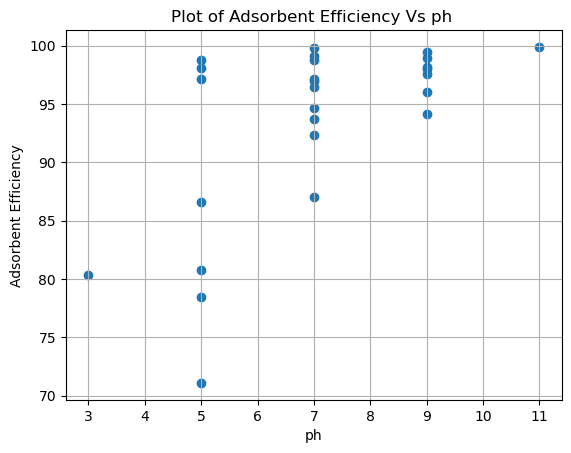

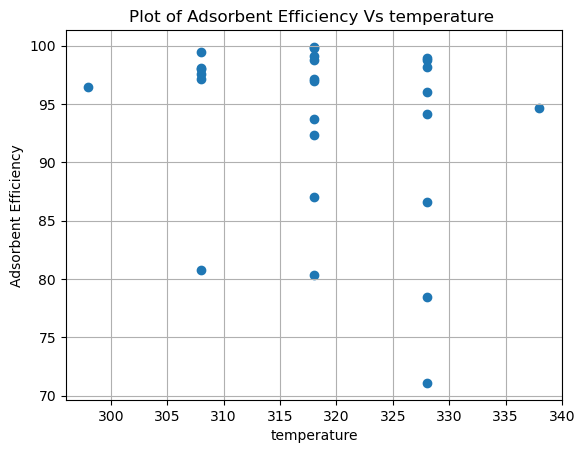

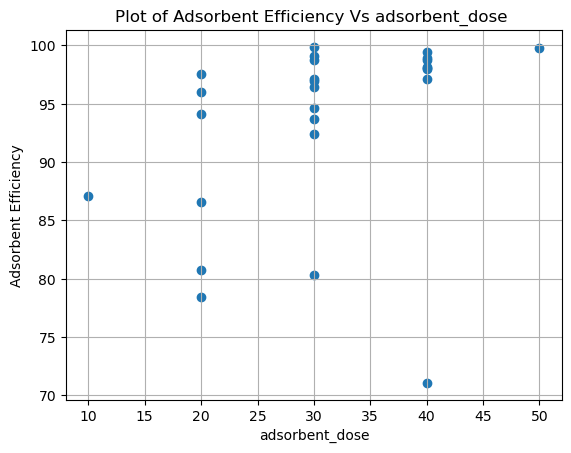

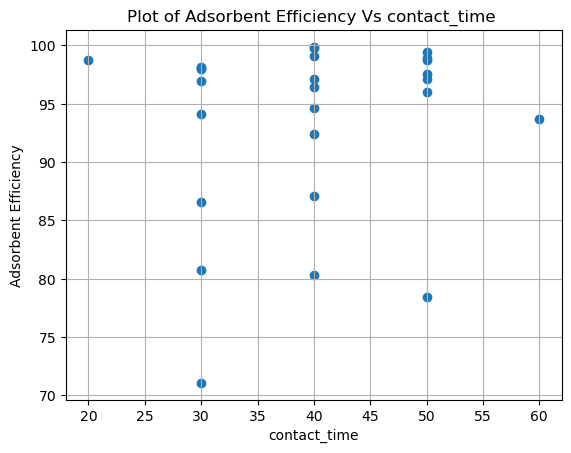

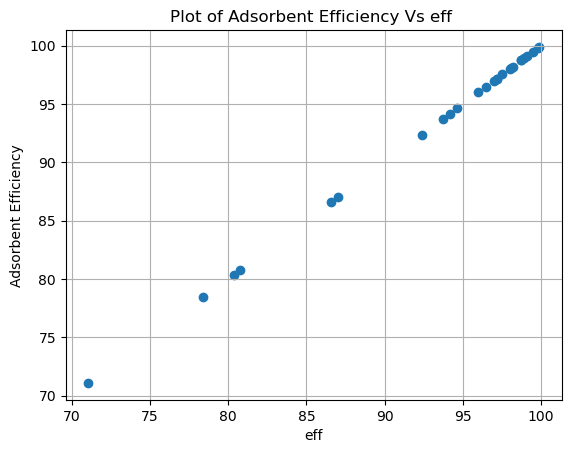

In [5]:
def plot_graph():
    for i in data.columns:
        plt.scatter(data[i], data['eff'])
        plt.grid()
        plt.xlabel(f"{i}")
        plt.ylabel("Adsorbent Efficiency")
        plt.title(f"Plot of Adsorbent Efficiency Vs {i} ")
        plt.show()
plot_graph()

## Splitting Data

In [6]:
from sklearn.model_selection import train_test_split
# splitting dataset
X_data = data.drop(['eff'], axis=1) # all columns except `eff`
y_data = data['eff'] # 'eff' only

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

## Model Training and Evaluation

In [7]:
## model evaluation
def evaluate_model(y_true, y_pred, label="Test"):
    rmse = mean_squared_error(y_true, y_pred, squared=False) # Root Mean Squared
    variance = r2_score(y_true, y_pred)    # R2 score 
    return f'{label} set RMSE:{rmse}, R2:{variance}'

Using plain Linear Regression as a baseline model without standardization or normalization

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
# define and create model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # model training

# model prediction
y_train = lin_reg.predict(X_train) 
y_pred = lin_reg.predict(X_test)

In [10]:
# visualization of results
pd.DataFrame([y_pred, y_test], index=['Predictions', 'True'])

,0,1,2
Predictions,97.583288,93.261835,100.49237
True,97.520000,97.150000,98.92000


In [11]:
# evaluation
print(evaluate_model(y_train, y_train, "Train"))
print(evaluate_model(y_test, y_pred, "Test"))

Train set RMSE:0.0, R2:1.0
Test set RMSE:2.4217195269372667, R2:-9.09264775026643


### Polynomial Regression without standardization

In [12]:
from sklearn.preprocessing import PolynomialFeatures
# define and create a polynomial features 
poly_feat = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_feat.fit_transform(X_train) # instance transformation 
X_test_poly = poly_feat.transform(X_test)

In [13]:
# define and create polynomial regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train) # model training

# model prediction
y_train = lin_reg.predict(X_train_poly)
y_pred = lin_reg.predict(X_test_poly)

In [14]:
# visualization of results
pd.DataFrame([y_pred, y_test], index=['Predictions', 'True'])

,0,1,2
Predictions,96.512539,93.261835,101.563119
True,97.520000,97.150000,98.920000


In [15]:
# model evaluation
print(evaluate_model(y_train, y_train, "Train"))
print(evaluate_model(y_test, y_pred, "Test"))

Train set RMSE:0.0, R2:1.0
Test set RMSE:2.776021003960044, R2:-12.261813746194125


## Polynomial Regression with Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
# define and create standard scaler
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly) # instance transformation
X_test_poly_scaled = scaler.transform(X_test_poly)

In [17]:
# define and create polynomial regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly_scaled , y_train) # model training

# model predictions
y_train = lin_reg.predict(X_train_poly_scaled )
y_pred = lin_reg.predict(X_test_poly_scaled )

In [18]:
# visualization of results 
pd.DataFrame([y_pred, y_test], index=['Predictions', 'True'])

,0,1,2
Predictions,97.599598,93.261835,100.476059
True,97.520000,97.150000,98.920000


In [19]:
# model evaluation
print(evaluate_model(y_train, y_train, "Train"))
print(evaluate_model(y_test, y_pred, "Test"))

Train set RMSE:0.0, R2:1.0
Test set RMSE:2.418365868984973, R2:-9.064714001767381
